In [1]:
apikey='H9iod5aNrd3jK2jF2XdK9ahATJMKg5khSVmnmk4m2JkbSN96P0qPj2Yhru90zPHe'
secret='L7DoVVoLGwCojEtHnirsPifL55TY0BVqhdtIuaTFhFLIyYhjkpvih^MrSwunp5kF8'

In [2]:
!pip install python-binance pandas mplfinance

In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np     
import datetime 

In [4]:
client=Client(apikey,secret)  

In [5]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815^",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]
#client.get_historical_klines??

In [6]:
historical = client.get_historical_klines('LTCUSDT',Client.KLINE_INTERVAL_1DAY,'2 May,2021')# parameters:(symbol, interval, date_from)
ltc = client.get_historical_klines('LTCUSDT',Client.KLINE_INTERVAL_1DAY,'1 Feb,2023')# parameters:(symbol, interval, date_from)
historical

[[1619913600000,
  '276.77000000',
  '277.47000000',
  '264.70000000',
  '268.88000000',
  '656429.21428000',
  1619999999999,
  '177326870.52538420',
  240118,
  '334587.08164000',
  '90378687.15221460',
  '0'],
 [1620000000000,
  '268.83000000',
  '299.72000000',
  '268.44000000',
  '294.87000000',
  '1427253.57143000',
  1620086399999,
  '406345333.74404910',
  551451,
  '741571.36225000',
  '211273296.54051310',
  '0'],
 [1620086400000,
  '294.73000000',
  '327.68000000',
  '270.00000000',
  '305.23000000',
  '3939316.56899000',
  1620172799999,
  '1195932190.83950180',
  1508821,
  '1956579.04576000',
  '593733728.24148680',
  '0'],
 [1620172800000,
  '305.24000000',
  '360.00000000',
  '300.52000000',
  '356.04000000',
  '3748897.98686000',
  1620259199999,
  '1271930983.03431820',
  1614035,
  '1886405.01435000',
  '640411029.33144030',
  '0'],
 [1620259200000,
  '356.03000000',
  '364.93000000',
  '318.00000000',
  '354.67000000',
  '2752093.00755000',
  1620345599999,
  '94146

In [7]:
hist_df=pd.DataFrame(historical)
ltc_df=pd.DataFrame(ltc)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1619913600000,276.77000000,277.47000000,264.70000000,268.88000000,656429.21428000,1619999999999,177326870.52538420,240118,334587.08164000,90378687.15221460,0
1,1620000000000,268.83000000,299.72000000,268.44000000,294.87000000,1427253.57143000,1620086399999,406345333.74404910,551451,741571.36225000,211273296.54051310,0
2,1620086400000,294.73000000,327.68000000,270.00000000,305.23000000,3939316.56899000,1620172799999,1195932190.83950180,1508821,1956579.04576000,593733728.24148680,0
3,1620172800000,305.24000000,360.00000000,300.52000000,356.04000000,3748897.98686000,1620259199999,1271930983.03431820,1614035,1886405.01435000,640411029.33144030,0
4,1620259200000,356.03000000,364.93000000,318.00000000,354.67000000,2752093.00755000,1620345599999,941466204.16390980,1185399,1386633.82425000,474650164.31048480,0


In [8]:
ltc_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1619913600000,276.77000000,277.47000000,264.70000000,268.88000000,656429.21428000,1619999999999,177326870.52538420,240118,334587.08164000,90378687.15221460,0
1,1620000000000,268.83000000,299.72000000,268.44000000,294.87000000,1427253.57143000,1620086399999,406345333.74404910,551451,741571.36225000,211273296.54051310,0
2,1620086400000,294.73000000,327.68000000,270.00000000,305.23000000,3939316.56899000,1620172799999,1195932190.83950180,1508821,1956579.04576000,593733728.24148680,0
3,1620172800000,305.24000000,360.00000000,300.52000000,356.04000000,3748897.98686000,1620259199999,1271930983.03431820,1614035,1886405.01435000,640411029.33144030,0
4,1620259200000,356.03000000,364.93000000,318.00000000,354.67000000,2752093.00755000,1620345599999,941466204.16390980,1185399,1386633.82425000,474650164.31048480,0


In [9]:
ltc_df.dtypes #int64 + objects (which are strings) >> preprocessing

date                   int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [10]:
hist_df.head()
type(hist_df.date[0])

numpy.int64

In [11]:
#convert from Unix timestamps to date
hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
hist_df['Close Time']= pd.to_datetime(hist_df['Close Time']/1000, unit='s')
hist_df.dtypes

date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [12]:
#convert from Unix timestamps to date
ltc_df['date']= pd.to_datetime(ltc_df['date']/1000, unit='s')
ltc_df['Close Time']= pd.to_datetime(ltc_df['Close Time']/1000, unit='s')
ltc_df.dtypes

date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [13]:
ltc_df.head() #notice open time and close time 

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-02-01,94.09000000,102.53000000,93.73000000,100.33000000,1324424.13100000,2023-02-01 23:59:59.999000064,128437281.94675000,285177,718617.26900000,69722529.33204000,0
1,2023-02-02,100.32000000,102.34000000,97.92000000,98.64000000,730534.05500000,2023-02-02 23:59:59.999000064,73204584.65212000,153947,352264.43000000,35315090.28698000,0
2,2023-02-03,98.64000000,100.76000000,97.48000000,99.86000000,568938.08700000,2023-02-03 23:59:59.999000064,56316609.24040000,121313,274062.69300000,27135940.65284000,0
3,2023-02-04,99.86000000,101.36000000,98.23000000,98.51000000,357081.56100000,2023-02-04 23:59:59.999000064,35530515.18392000,85103,171189.51100000,17039515.43394000,0
4,2023-02-05,98.51000000,98.89000000,94.86000000,96.63000000,417682.27500000,2023-02-05 23:59:59.999000064,40576721.44145000,98353,192781.02800000,18742356.41643000,0


In [14]:
ltc_df.date=ltc_df.date.apply(lambda x: x.date())
hist_df.date=hist_df.date.apply(lambda x: x.date())

In [15]:
numeric_columns=['Open','High','Low','Close','Volume','Quote Asset Volume','TB Base Volume','TB Quote Volume']
hist_df[numeric_columns]=hist_df[numeric_columns].apply(pd.to_numeric,axis=1)
ltc_df[numeric_columns]=ltc_df[numeric_columns].apply(pd.to_numeric,axis=1)
ltc_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-02-01,94.09,102.53,93.73,100.33,1324424.131,2023-02-01 23:59:59.999000064,1.284373e+08,285177,718617.269,6.972253e+07,0
1,2023-02-02,100.32,102.34,97.92,98.64,730534.055,2023-02-02 23:59:59.999000064,7.320458e+07,153947,352264.430,3.531509e+07,0
2,2023-02-03,98.64,100.76,97.48,99.86,568938.087,2023-02-03 23:59:59.999000064,5.631661e+07,121313,274062.693,2.713594e+07,0
3,2023-02-04,99.86,101.36,98.23,98.51,357081.561,2023-02-04 23:59:59.999000064,3.553052e+07,85103,171189.511,1.703952e+07,0
4,2023-02-05,98.51,98.89,94.86,96.63,417682.275,2023-02-05 23:59:59.999000064,4.057672e+07,98353,192781.028,1.874236e+07,0


In [16]:
ltc_df.dtypes

date                          object
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [17]:
ltc_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,94.000000,94.000000,94.000000,94.000000,9.400000e+01,9.400000e+01,94.000000,94.000000,9.400000e+01
mean,91.010851,93.337340,88.264149,90.946809,7.231041e+05,6.448294e+07,157626.968085,353113.024000,3.150735e+07
std,6.507358,6.208266,6.940281,6.507204,3.842308e+05,3.065234e+07,72318.633171,191019.109214,1.534652e+07
min,69.210000,73.830000,65.000000,69.210000,1.523685e+05,1.343926e+07,32600.000000,75423.453000,6.654293e+06
25%,88.260000,89.657500,85.565000,88.205000,4.341694e+05,4.185491e+07,106166.750000,219523.507000,2.021173e+07
50%,91.525000,94.240000,89.235000,91.405000,6.471536e+05,5.942464e+07,141351.500000,314210.295500,2.938495e+07
75%,95.095000,96.952500,92.957500,95.100000,8.972961e+05,7.693251e+07,187342.750000,405905.410500,3.719289e+07
max,102.830000,105.710000,98.930000,102.820000,1.958666e+06,1.688043e+08,394369.000000,962102.168000,8.630967e+07


In [18]:
ltc_df.describe(include='object')

,date,Ignore
count,94,94
unique,94,1
top,2023-02-01,0
freq,1,94


In [19]:
ltc_df.describe(include='datetime')

/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_7944/261289646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ltc_df.describe(include='datetime')


,Close Time
count,94
unique,94
top,2023-02-01 23:59:59.999000064
freq,1
first,2023-02-01 23:59:59.999000064
last,2023-05-05 23:59:59.999000064


In [20]:
ltc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                94 non-null     object        
 1   Open                94 non-null     float64       
 2   High                94 non-null     float64       
 3   Low                 94 non-null     float64       
 4   Close               94 non-null     float64       
 5   Volume              94 non-null     float64       
 6   Close Time          94 non-null     datetime64[ns]
 7   Quote Asset Volume  94 non-null     float64       
 8   Number of Trades    94 non-null     int64         
 9   TB Base Volume      94 non-null     float64       
 10  TB Quote Volume     94 non-null     float64       
 11  Ignore              94 non-null     object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 8.9+ KB


In [21]:
ltc_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-02-01,94.09,102.53,93.73,100.33,1324424.131,2023-02-01 23:59:59.999000064,1.284373e+08,285177,718617.269,6.972253e+07,0
1,2023-02-02,100.32,102.34,97.92,98.64,730534.055,2023-02-02 23:59:59.999000064,7.320458e+07,153947,352264.430,3.531509e+07,0
2,2023-02-03,98.64,100.76,97.48,99.86,568938.087,2023-02-03 23:59:59.999000064,5.631661e+07,121313,274062.693,2.713594e+07,0
3,2023-02-04,99.86,101.36,98.23,98.51,357081.561,2023-02-04 23:59:59.999000064,3.553052e+07,85103,171189.511,1.703952e+07,0
4,2023-02-05,98.51,98.89,94.86,96.63,417682.275,2023-02-05 23:59:59.999000064,4.057672e+07,98353,192781.028,1.874236e+07,0


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_7944/2087155994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = ltc_df.corr()


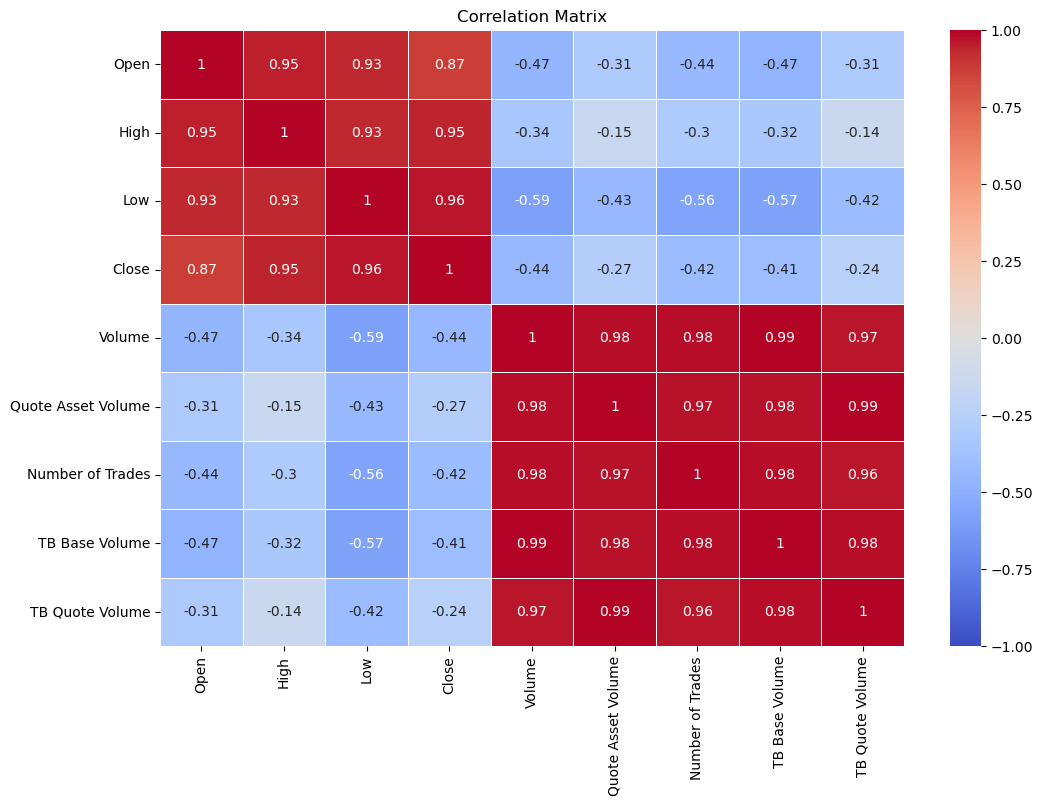

In [23]:
correlations = ltc_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [24]:
data_csv=hist_df.drop(['Quote Asset Volume','TB Quote Volume','Number of Trades','TB Base Volume','Close Time','Ignore'],axis=1)
data_csv.to_csv('ltc_prediction_data.csv')
data_csv

,date,Open,High,Low,Close,Volume
0,2021-05-02,276.77,277.47,264.70,268.88,6.564292e+05
1,2021-05-03,268.83,299.72,268.44,294.87,1.427254e+06
2,2021-05-04,294.73,327.68,270.00,305.23,3.939317e+06
3,2021-05-05,305.24,360.00,300.52,356.04,3.748898e+06
4,2021-05-06,356.03,364.93,318.00,354.67,2.752093e+06
...,...,...,...,...,...,...
729,2023-05-01,88.24,88.86,85.13,86.75,5.379066e+05
730,2023-05-02,86.76,89.18,86.00,88.20,4.252549e+05
731,2023-05-03,88.20,89.86,85.40,88.88,5.615523e+05
732,2023-05-04,88.88,89.15,87.39,88.38,3.170929e+05


In [25]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    734 non-null    object 
 1   Open    734 non-null    float64
 2   High    734 non-null    float64
 3   Low     734 non-null    float64
 4   Close   734 non-null    float64
 5   Volume  734 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.5+ KB


In [26]:
import requests

url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day'
params = {'fsym': 'LTC', 'limit': 730, 'api_key': 'e6a9a2c327eba343b8ba318f86017574f6d9bdb9d5d13ae643531bda926f5e32'}

response = requests.get(url, params=params)

if response.status_code != 200:
    print(f'Request failed with status code {response.status_code}.')
else:
    data = response.json()['Data']
    print(data)


{'Aggregated': False, 'TimeFrom': 1620172800, 'TimeTo': 1683244800, 'Data': [{'id': 3808, 'symbol': 'LTC', 'time': 1620172800, 'zero_balance_addresses_all_time': 76555392, 'unique_addresses_all_time': 79562842, 'new_addresses': 160947, 'active_addresses': 395153, 'transaction_count': 144331, 'transaction_count_all_time': 69384222, 'large_transaction_count': 5559, 'average_transaction_value': 82.310685407893, 'block_height': 2047304, 'hashrate': 371.898007986464, 'difficulty': 11752138.8090683, 'block_time': 135.722834645669, 'block_size': 136943, 'current_supply': 66752414.5153875}, {'id': 3808, 'symbol': 'LTC', 'time': 1620259200, 'zero_balance_addresses_all_time': 76690765, 'unique_addresses_all_time': 79719343, 'new_addresses': 156501, 'active_addresses': 381175, 'transaction_count': 131020, 'transaction_count_all_time': 69515242, 'large_transaction_count': 6217, 'average_transaction_value': 93.3830638307509, 'block_height': 2047907, 'hashrate': 352.056322668131, 'difficulty': 11752

In [27]:
import pandas as pd

df = pd.DataFrame(data)
print(df.head())

   Aggregated    TimeFrom      TimeTo  \
0       False  1620172800  1683244800   
1       False  1620172800  1683244800   
2       False  1620172800  1683244800   
3       False  1620172800  1683244800   
4       False  1620172800  1683244800   

                                                Data  
0  {'id': 3808, 'symbol': 'LTC', 'time': 16201728...  
1  {'id': 3808, 'symbol': 'LTC', 'time': 16202592...  
2  {'id': 3808, 'symbol': 'LTC', 'time': 16203456...  
3  {'id': 3808, 'symbol': 'LTC', 'time': 16204320...  
4  {'id': 3808, 'symbol': 'LTC', 'time': 16205184...  


In [28]:
data_column = df['Data']
print(data_column[0])

{'id': 3808, 'symbol': 'LTC', 'time': 1620172800, 'zero_balance_addresses_all_time': 76555392, 'unique_addresses_all_time': 79562842, 'new_addresses': 160947, 'active_addresses': 395153, 'transaction_count': 144331, 'transaction_count_all_time': 69384222, 'large_transaction_count': 5559, 'average_transaction_value': 82.310685407893, 'block_height': 2047304, 'hashrate': 371.898007986464, 'difficulty': 11752138.8090683, 'block_time': 135.722834645669, 'block_size': 136943, 'current_supply': 66752414.5153875}


In [29]:
import pandas as pd

# assuming your original dataframe is called 'df'
blockchain_ltc = pd.json_normalize(df['Data'])
# now df contains a flat dataframe with the columns from the dictionary in the 'Data' column
print(blockchain_ltc.head())

     id symbol        time  zero_balance_addresses_all_time  \
0  3808    LTC  1620172800                         76555392   
1  3808    LTC  1620259200                         76690765   
2  3808    LTC  1620345600                         76826140   
3  3808    LTC  1620432000                         76954743   
4  3808    LTC  1620518400                         77088146   

   unique_addresses_all_time  new_addresses  active_addresses  \
0                   79562842         160947            395153   
1                   79719343         156501            381175   
2                   79870186         150843            382198   
3                   80013086         142900            334716   
4                   80147582         134496            251058   

   transaction_count  transaction_count_all_time  large_transaction_count  \
0             144331                    69384222                     5559   
1             131020                    69515242                     6217   

In [30]:
#hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
blockchain_ltc['time'] = pd.to_datetime(blockchain_ltc['time'], unit='s')

In [31]:
blockchain_ltc = blockchain_ltc.rename(columns={'time': 'date'})

In [32]:
blockchain_ltc.date=blockchain_ltc.date.apply(lambda x: x.date())

In [33]:
blockchain_ltc.head()

,id,symbol,date,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
0,3808,LTC,2021-05-05,76555392,79562842,160947,395153,144331,69384222,5559,82.310685,2047304,371.898008,1.175214e+07,135.722835,136943,6.675241e+07
1,3808,LTC,2021-05-06,76690765,79719343,156501,381175,131020,69515242,6217,93.383064,2047907,352.056323,1.175214e+07,143.372093,120593,6.675241e+07
2,3808,LTC,2021-05-07,76826140,79870186,150843,382198,127395,69642637,7267,95.783928,2048514,364.635073,1.210024e+07,142.526403,125525,6.675241e+07
3,3808,LTC,2021-05-08,76954743,80013086,142900,334716,122729,69765366,5745,66.431763,2049096,364.663260,1.256795e+07,148.024096,133922,6.675241e+07
4,3808,LTC,2021-05-09,77088146,80147582,134496,251058,118166,69883532,5305,63.668707,2049640,340.876068,1.256795e+07,158.353591,117518,6.675241e+07


In [34]:
blockchain_ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               729 non-null    int64  
 1   symbol                           729 non-null    object 
 2   date                             729 non-null    object 
 3   zero_balance_addresses_all_time  729 non-null    int64  
 4   unique_addresses_all_time        729 non-null    int64  
 5   new_addresses                    729 non-null    int64  
 6   active_addresses                 729 non-null    int64  
 7   transaction_count                729 non-null    int64  
 8   transaction_count_all_time       729 non-null    int64  
 9   large_transaction_count          729 non-null    int64  
 10  average_transaction_value        729 non-null    float64
 11  block_height                     729 non-null    int64  
 12  hashrate              

In [35]:
merged_df = pd.merge(data_csv, blockchain_ltc, on=['date'])

In [36]:
merged_df.head()

,date,Open,High,Low,Close,Volume,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
0,2021-05-05,305.24,360.00,300.52,356.04,3.748898e+06,3808,LTC,76555392,79562842,...,144331,69384222,5559,82.310685,2047304,371.898008,1.175214e+07,135.722835,136943,6.675241e+07
1,2021-05-06,356.03,364.93,318.00,354.67,2.752093e+06,3808,LTC,76690765,79719343,...,131020,69515242,6217,93.383064,2047907,352.056323,1.175214e+07,143.372093,120593,6.675241e+07
2,2021-05-07,354.52,374.50,333.33,344.89,2.822668e+06,3808,LTC,76826140,79870186,...,127395,69642637,7267,95.783928,2048514,364.635073,1.210024e+07,142.526403,125525,6.675241e+07
3,2021-05-08,344.89,356.68,334.00,347.10,1.327716e+06,3808,LTC,76954743,80013086,...,122729,69765366,5745,66.431763,2049096,364.663260,1.256795e+07,148.024096,133922,6.675241e+07
4,2021-05-09,347.17,389.00,333.51,387.80,2.292100e+06,3808,LTC,77088146,80147582,...,118166,69883532,5305,63.668707,2049640,340.876068,1.256795e+07,158.353591,117518,6.675241e+07


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             729 non-null    object 
 1   Open                             729 non-null    float64
 2   High                             729 non-null    float64
 3   Low                              729 non-null    float64
 4   Close                            729 non-null    float64
 5   Volume                           729 non-null    float64
 6   id                               729 non-null    int64  
 7   symbol                           729 non-null    object 
 8   zero_balance_addresses_all_time  729 non-null    int64  
 9   unique_addresses_all_time        729 non-null    int64  
 10  new_addresses                    729 non-null    int64  
 11  active_addresses                 729 non-null    int64  
 12  transaction_count     

In [38]:
merged_df=merged_df.drop(['symbol','id'],axis=1)

/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_7944/600487050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr()


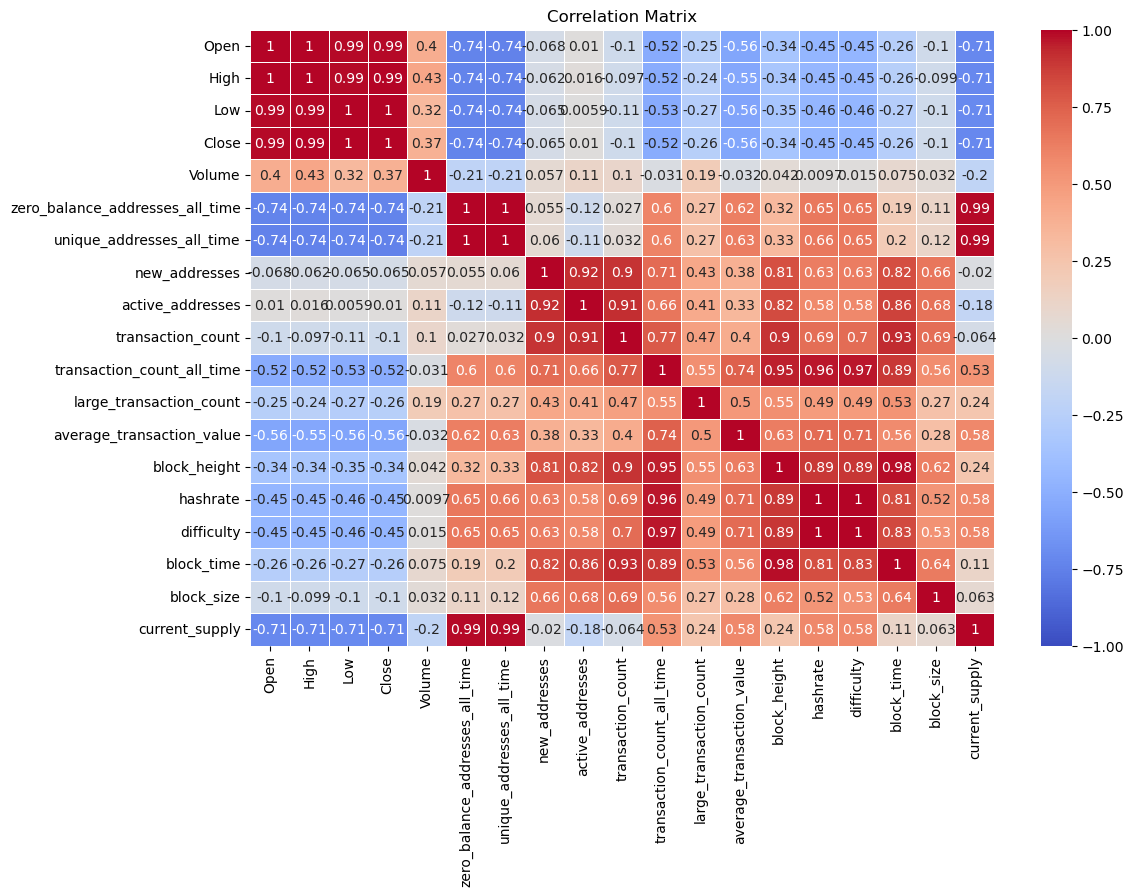

In [39]:
correlations = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [40]:
correlations['Open'].sort_values(ascending=False)

Open                               1.000000
High                               0.996622
Low                                0.990007
Close                              0.989317
Volume                             0.395079
active_addresses                   0.010429
new_addresses                     -0.067565
block_size                        -0.101129
transaction_count                 -0.104631
large_transaction_count           -0.252671
block_time                        -0.263155
block_height                      -0.344406
hashrate                          -0.453875
difficulty                        -0.453949
transaction_count_all_time        -0.524473
average_transaction_value         -0.558226
current_supply                    -0.713796
zero_balance_addresses_all_time   -0.741936
unique_addresses_all_time         -0.744850
Name: Open, dtype: float64

In [41]:
csv_file=merged_df.to_csv('data_with_blockchain_ltc.csv')

In [42]:
# import requests

url = 'https://api.blockchair.com/litecoin/stats/block_size'

response = requests.get(url)
print(response)
data = response.json()
print(data)


<Response [200]>
{'data': {'blocks': 2468479, 'transactions': 152414961, 'outputs': 494500385, 'circulation': 7285403323347135, 'blocks_24h': 598, 'transactions_24h': 281107, 'difficulty': 24703863.449794, 'volume_24h': 5930726775988749, 'mempool_transactions': 695, 'mempool_size': 320833, 'mempool_tps': 1.05, 'mempool_total_fee_usd': 3.5027, 'best_block_height': 2468478, 'best_block_hash': '925be81b50c5ccdb8f0b0c816c85319aa1207315055e4d3e4916f655e90e37f7', 'best_block_time': '2023-05-05 11:30:11', 'blockchain_size': 97664698687, 'average_transaction_fee_24h': 6470, 'inflation_24h': 747500000000, 'median_transaction_fee_24h': 2220, 'cdd_24h': 33725385.19466448, 'mempool_outputs': 3519, 'largest_transaction_24h': {'hash': 'a11c014250ef3dfd67bc106406ccbe738bb1da8f4182cbbcfbd3ecd9d06a3dbd', 'value_usd': 76116824}, 'nodes': 1002, 'hashrate_24h': '736821414374058', 'inflation_usd_24h': 658173.75, 'average_transaction_fee_usd_24h': 0.005697374656945575, 'median_transaction_fee_usd_24h': 0.00

In [ ]:
import requests

url = 'https://api.blockchair.com/litecoin/stats/block_size?time_start=6%20years%20ago&time_end=now'
response = requests.get(url)
data = response.json()
print(data)


In [6]:
import requests

# Set API endpoint
url = 'https://api.blockchair.com/litecoin/blocks'

# Set query parameters
params = {
    'q': 'time(2019-01-01..2021-01-01)',
    'a': 'guessed_miner,count()',
    's': 'count()(desc)'
}

# Make API request
response = requests.get(url, params=params)

# Print response data
print(response.json())


{'data': [{'guessed_miner': 'Unknown', 'count()': 152791}, {'guessed_miner': 'F2Pool', 'count()': 65579}, {'guessed_miner': 'ViaBTC', 'count()': 45868}, {'guessed_miner': 'litecoinpool.org', 'count()': 44405}, {'guessed_miner': 'AntPool', 'count()': 42096}, {'guessed_miner': 'BTC.com', 'count()': 34107}, {'guessed_miner': 'LTC.TOP', 'count()': 32673}, {'guessed_miner': 'DPOOL', 'count()': 2319}, {'guessed_miner': 'Sigmapool', 'count()': 1396}, {'guessed_miner': 'TBDice', 'count()': 671}], 'context': {'code': 200, 'source': 'A', 'limit': 10000, 'offset': 0, 'rows': 10, 'pre_rows': 10, 'total_rows': 10, 'state': 2471909, 'market_price_usd': 79.05, 'cache': {'live': True, 'duration': 120, 'since': '2023-05-11 18:09:56', 'until': '2023-05-11 18:11:56', 'time': None}, 'api': {'version': '2.0.95-ie', 'last_major_update': '2022-11-07 02:00:00', 'next_major_update': None, 'documentation': 'https://blockchair.com/api/docs', 'notice': 'Please note that on November 7th, 2022 public support for th

In [3]:
import requests
import json

# Define the API endpoint URL
url = 'https://api.blockchair.com/litecoin/blocks'

# Define the start and end times for the blockchain data
start_time = '2022-01-02'
end_time = '2023-05-10'

# Set the initial page number to 1
page_num = 1

# Set a flag to indicate when we've reached the end of the data
end_of_data = False

# Define an empty list to hold the block data
block_data = []

# Loop through the API pages until we reach the end of the data
while not end_of_data:
    
    # Make the API request with the current page number and time range
    response = requests.get(url, params={'q': 'time({}..{})'.format(start_time, end_time), 's': 'id', 'p': page_num})
    
    # Check if the response was successful
    if response.status_code == 200:
        
        # Parse the JSON response
        data = json.loads(response.text)
        
        # Check if there is any data in the current page
        if data['data']:
            
            # Append the block data to the list
            block_data += data['data']
            
            # Increment the page number to fetch the next page
            page_num += 1
            
        else:
            # If there is no data in the current page, we've reached the end of the data
            end_of_data = True
            
    else:
        # If the API request was unsuccessful, print the error message
        print('Error: {}'.format(response.text))
        end_of_data = True

# Print the total number of blocks fetched
print('Fetched {} blocks'.format(len(block_data)))


Error: {"data":null,"context":{"code":400,"error":"Wrong sorting expression","market_price_usd":80.5,"cache":{"live":true,"duration":120,"since":"2023-05-11 17:20:20","until":"2023-05-11 17:22:20","time":null},"api":{"version":"2.0.95-ie","last_major_update":"2022-11-07 02:00:00","next_major_update":null,"documentation":"https:\/\/blockchair.com\/api\/docs","notice":"Please note that on November 7th, 2022 public support for the following blockchains was dropped: EOS, Bitcoin SV"},"servers":"API4,LTC0","time":2.5987625122070312e-5,"render_time":0.0021049976348876953,"full_time":0.0021309852600097656,"request_cost":2}}
Fetched 0 blocks


In [4]:
import requests

# set the API endpoint
url = 'https://api.blockchair.com/litecoin/blocks'

# set the query parameters
params = {
    'q': 'time(2019-01-01..2021-01-01)',
    's': 'height(desc)',
    'limit': 1000, # maximum number of results per page
    'offset': 0, # start from the first page
}

# initialize an empty list to store the blocks
blocks = []

# fetch the blocks from the API endpoint
while True:
    response = requests.get(url, params=params)
    data = response.json()['data']
    blocks.extend(data)

    # check if there are more pages to fetch
    if len(data) < params['limit']:
        break

    # update the offset to fetch the next page
    params['offset'] += params['limit']

# print the total number of blocks fetched
print(f'Total blocks fetched: {len(blocks)}')


TypeError: 'NoneType' object is not iterable

In [9]:
import requests

# Set API endpoint
url = 'https://api.blockchair.com/litecoin/stats?api_key=YOUR_API_KEY'

# Set query parameters
params = {
    'fields': ','.join([
        'hash_rate_24h',
        'avg_block_size_24h',
        'blockchain_size',
        'blocks_24h',
        'cost_per_transaction_percent',
        'difficulty',
        'estimated_transaction_volume_24h',
        'estimated_transaction_volume_usd_24h',
        'hash_rate',
        'n_transactions',
        'market_price_usd',
        'n_addresses',
        'n_transactions_per_block',
        'n_transactions_total',
        'miner_revenue_usd_24h',
        'transaction_fees_usd_24h',
        'transaction_fees_usd',
        'n_transactions_excluding_popular',
        'n_transactions_excluding_chains_longer_than_100',
        'output_volume_24h',
        'total_coins_mined',
        'trade_volume_usd_24h'
    ]),
    's': 'date',
    'q': 'date(2022-01-01..2022-12-31)'
}

# Make API request
response = requests.get(url, params=params)

# Print response data
print(response.json())


{'data': {'blocks': 2471910, 'transactions': 155463511, 'outputs': 500146402, 'circulation': 7289692073347135, 'blocks_24h': 554, 'transactions_24h': 495252, 'difficulty': 22964510.851748, 'volume_24h': 5204414429288197, 'mempool_transactions': 1510, 'mempool_size': 664797, 'mempool_tps': 1.9166666666666667, 'mempool_total_fee_usd': 9.5197, 'best_block_height': 2471909, 'best_block_hash': '291b1c20a0fe1e7dc346ce499ab01b7a290da63f509782de80e5f442357568cc', 'best_block_time': '2023-05-11 18:08:25', 'blockchain_size': 98822274765, 'average_transaction_fee_24h': 3965, 'inflation_24h': 692500000000, 'median_transaction_fee_24h': 695, 'cdd_24h': 10313184.653395245, 'mempool_outputs': 7128, 'largest_transaction_24h': {'hash': 'ba2a934283771c4d8373b4a49f7907b1f9e7fb7538aecc3718e376208c3c3130', 'value_usd': 52115156}, 'nodes': 1009, 'hashrate_24h': '636334318830096', 'inflation_usd_24h': 546244, 'average_transaction_fee_usd_24h': 0.0031276378927640874, 'median_transaction_fee_usd_24h': 0.000548

In [ ]:
import requests

# Set up the API endpoint URL
url = "https://api.blockchair.com/litecoin/stats"

# Set up the query parameters for the request
params = {
    "q": "price_usd,market_cap_usd,volume_24h_usd",
    "s": "date",
    "u": "month"
}

# Send the GET request to the API endpoint
response = requests.get(url, params=params)

# Parse the response JSON data
data = response.json()

# Print the data
print(data)


In [1]:
import warnings
import requests
from datetime import datetime
import pandas as pd

# Ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the base URL for the Litecoin API
url = 'https://api.blockchair.com/litecoin/charts'

# Set the query parameters
params = {
    's': 'date',
    'u': 'usd',
    'export': 'csv'
}

# Define the data to retrieve
data_types = ['hashrate', 'price', 'difficulty', 'transaction_count', 'block_count']

# Initialize a dictionary to store the dataframes
dfs = {}

# Loop over the data types and retrieve the data
for data_type in data_types:
    # Set the API endpoint for the current data type
    current_url = f"{url}/{data_type}"
    
    # Make the API request
    response = requests.get(current_url, params=params)
    
    # Convert the CSV data to a DataFrame
    df = pd.read_csv(response.content.decode('utf-8'))
    df.columns = ['date', data_type]
    
    # Convert the date column to a datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    # Set the date column as the index
    df.set_index('date', inplace=True)
    
    # Store the DataFrame in the dictionary
    dfs[data_type] = df

# Print the DataFrames
for data_type, df in dfs.items():
    print(f"{data_type}:")
    print(df)
    print("\n")


OSError: [Errno 63] File name too long: '{"data":null,"context":{"code":430,"error":"Your IP address is temporary blacklisted due to exceeding usage of API resources. Please apply for an API key by contacting us at info@blockchair.com","market_price_usd":78.88,"cache":{"live":true,"duration":120,"since":"2023-05-11 18:28:07","until":"2023-05-11 18:30:07","time":null},"api":{"version":"2.0.95-ie","last_major_update":"2022-11-07 02:00:00","next_major_update":null,"documentation":"https:\\/\\/blockchair.com\\/api\\/docs","notice":"Please note that on November 7th, 2022 public support for the following blockchains was dropped: EOS, Bitcoin SV"},"servers":"API4","time":null,"render_time":0.0015079975128173828,"full_time":0.0015079975128173828,"request_cost":1}}'